# Oran Graduate School of Economics 
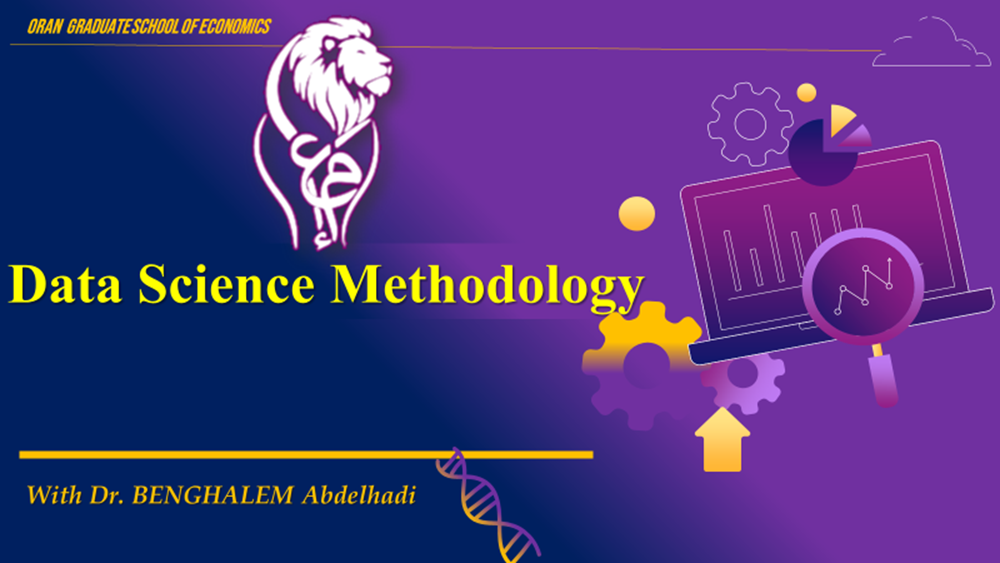

## ***A hypothetical descriptive modeling problem using R. 

* Problem Statement:
Suppose you work for a retail company and have been tasked with analyzing sales data to understand customer purchasing behavior. The goal is to create a descriptive model that provides insights into customer buying patterns

Step 1: Data Collection
You'd start by collecting sales data, which might include information such as customer ID, purchase date, items purchased, quantity, price, etc. For this example, let's generate some sample data.

In [7]:
# Generating sample sales data
set.seed(123)
customer_id <- sample(1:100, 1000, replace = TRUE)
purchase_date <- as.Date(sample(seq(as.Date('2022/01/01'), as.Date('2022/12/31'), by="day"), 1000, replace = TRUE))
item <- sample(letters[1:10], 1000, replace = TRUE)
quantity <- sample(1:5, 1000, replace = TRUE)
price <- runif(1000, min = 5, max = 100)

sales_data <- data.frame(CustomerID = customer_id,
                         PurchaseDate = purchase_date,
                         Item = item,
                         Quantity = quantity,
                         Price = price)
head(sales_data)


,CustomerID,PurchaseDate,Item,Quantity,Price
,<int>,<date>,<chr>,<int>,<dbl>
1,31,2022-11-23,g,2,23.033414
2,79,2022-02-03,h,2,75.619709
3,51,2022-07-20,h,2,65.323210
4,14,2022-10-30,f,2,53.035488
5,67,2022-05-09,e,2,7.629732
6,42,2022-09-23,i,1,10.800889


* Step 2: Data Exploration
Next, explore the data to understand its structure, summary statistics, and visualizations to get insights into customer behavior

   CustomerID     PurchaseDate            Item              Quantity   
 Min.   :  1.0   Min.   :2022-01-01   Length:1000        Min.   :1.00  
 1st Qu.: 26.0   1st Qu.:2022-04-02   Class :character   1st Qu.:2.00  
 Median : 52.0   Median :2022-07-04   Mode  :character   Median :3.00  
 Mean   : 51.4   Mean   :2022-07-01                      Mean   :2.92  
 3rd Qu.: 76.0   3rd Qu.:2022-09-28                      3rd Qu.:4.00  
 Max.   :100.0   Max.   :2022-12-30                      Max.   :5.00  
     Price       
 Min.   : 5.151  
 1st Qu.:30.828  
 Median :52.438  
 Mean   :53.161  
 3rd Qu.:75.569  
 Max.   :99.970  

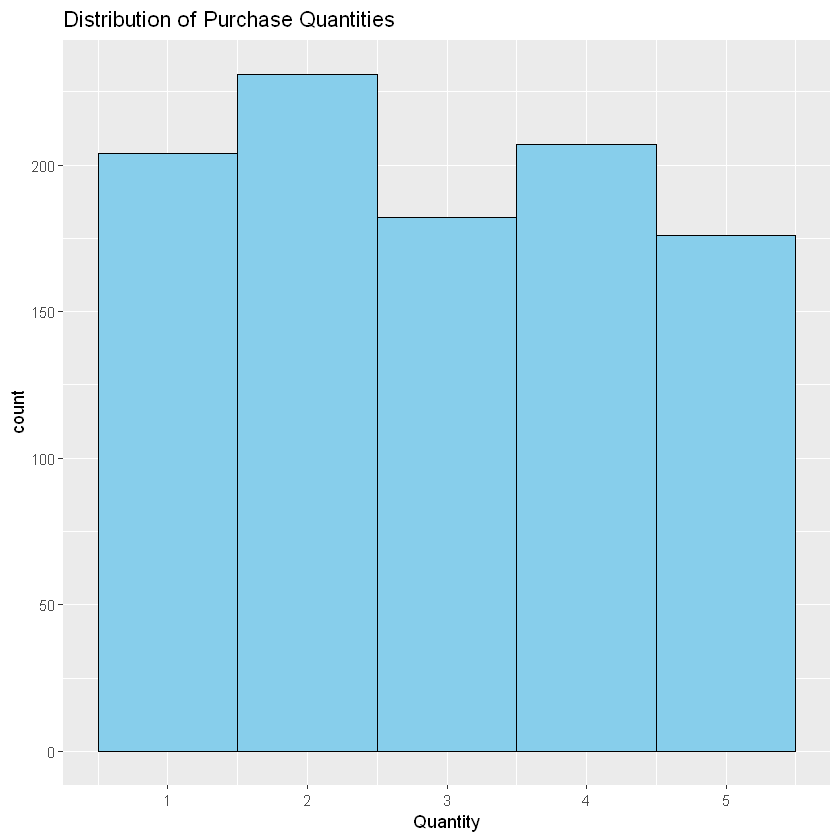

In [2]:
# Summary statistics
summary(sales_data)

# Visualizations
library(ggplot2)

# Example: Histogram of purchase quantities
ggplot(sales_data, aes(x = Quantity)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Purchase Quantities")

# Other exploratory plots and summaries as needed


* Step 3: Descriptive Analysis
Perform descriptive analysis to uncover patterns or trends in customer purchases. For instance, you might want to analyze:

Monthly sales trends
Most popular items
Customer segmentation based on purchase behavior
Average purchase amount per customer, etc.

tibble [12 x 2] (S3: tbl_df/tbl/data.frame)
 $ MonthYear : chr [1:12] "2022-01" "2022-02" "2022-03" "2022-04" ...
 $ TotalSales: num [1:12] 3940 4786 4381 3432 4534 ...


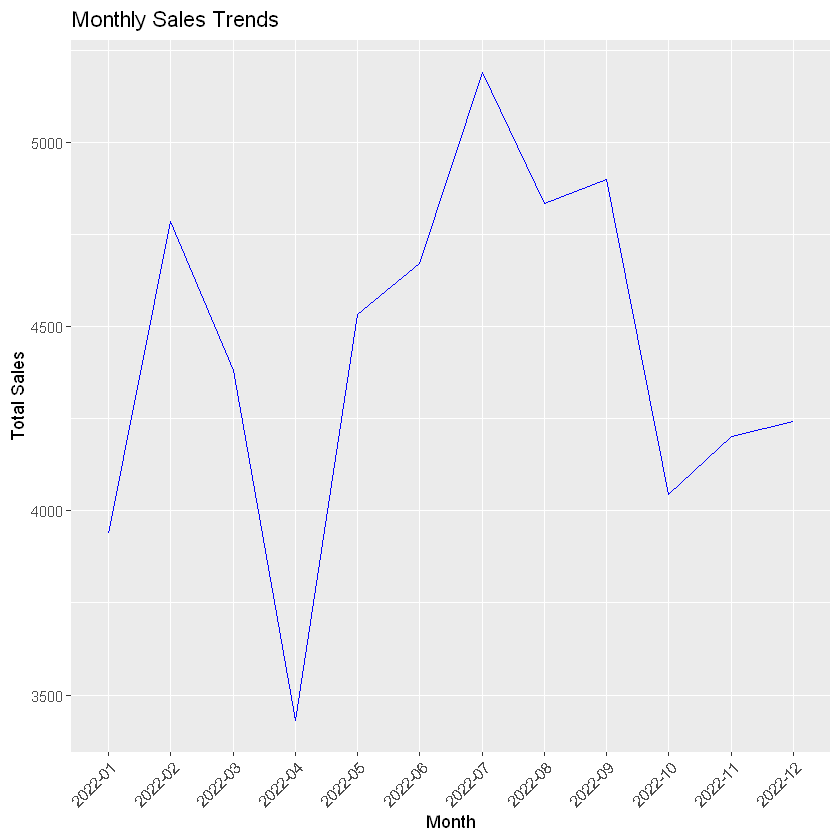

In [6]:
# Ensure PurchaseDate is in the correct format
sales_data$PurchaseDate <- as.Date(sales_data$PurchaseDate)

# Create a column for Month and Year
sales_data$MonthYear <- format(sales_data$PurchaseDate, "%Y-%m")

# Aggregate sales by MonthYear
monthly_sales <- sales_data %>%
  group_by(MonthYear) %>%
  summarise(TotalSales = sum(Price))

# Check the structure of monthly_sales to verify the aggregation
str(monthly_sales)

# Plot monthly sales trends
library(ggplot2)

ggplot(monthly_sales, aes(x = MonthYear, y = TotalSales, group = 1)) +
  geom_line(color = "blue") +
  labs(title = "Monthly Sales Trends", x = "Month", y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotating x-axis labels for better readability


* Step 4: Interpretation and Insights
Finally, interpret the descriptive analysis results to draw meaningful insights. For instance, you might find that certain items sell more during specific months, or identify customer segments with different buying behaviors.

This is a basic outline of how you might approach creating a descriptive model for understanding customer purchasing behavior using R. Actual analysis would involve more in-depth exploration, statistical tests, and potentially machine learning techniques for segmentation or predictive modeling.